# remake figure 4 from Feng et al.

Steps:
* Determine location of each track

In [2]:
%matplotlib inline
import xarray as xr
from glob import glob
import numpy as np
import pandas as pd
import cartopy.crs as ccrs   # map plots
import cartopy.feature as cfeature
from e3sm_utils import cmclimate
cmap_prect = cmclimate.cm.WhiteBlueGreenYellowRed
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [11]:
dsa = xr.open_dataset('/global/cscratch1/sd/crjones/ECP/e3sm-mmf/seasonal_mcs_count_land_only.nc')
dsb = xr.open_dataset('/global/cscratch1/sd/crjones/ECP/e3sm/seasonal_mcs_count_land_only.nc')

In [12]:
ds = xr.concat([dsa, dsb], dim=pd.Index(('MMF', 'E3SM'), name='model'))

In [13]:
ds

<xarray.Dataset>
Dimensions:             (lat: 120, lon: 320, model: 2, season: 3, track: 310, year: 7)
Coordinates:
  * year                (year) datetime64[ns] 2001-06-30 ... 2007-06-30
  * season              (season) object 'MAM' 'JJA' 'SON'
  * lat                 (lat) float32 20.125 20.375 20.625 ... 49.625 49.875
  * lon                 (lon) float32 220.125 220.375 ... 299.625 299.875
  * track               (track) int64 1 2 3 4 5 6 7 ... 305 306 307 308 309 310
  * model               (model) object 'MMF' 'E3SM'
Data variables:
    seasonal_mcs_count  (model, year, season, lat, lon) float64 0.0 0.0 ... nan
    init_loc            (model, year, track) float64 2.0 1.0 1.0 ... nan nan nan

In [17]:
nlon = 320
nlat = 120
months = np.arange(3, 11)
seasons = ['MAM', 'JJA']

In [9]:
# prepare figure canvas:
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


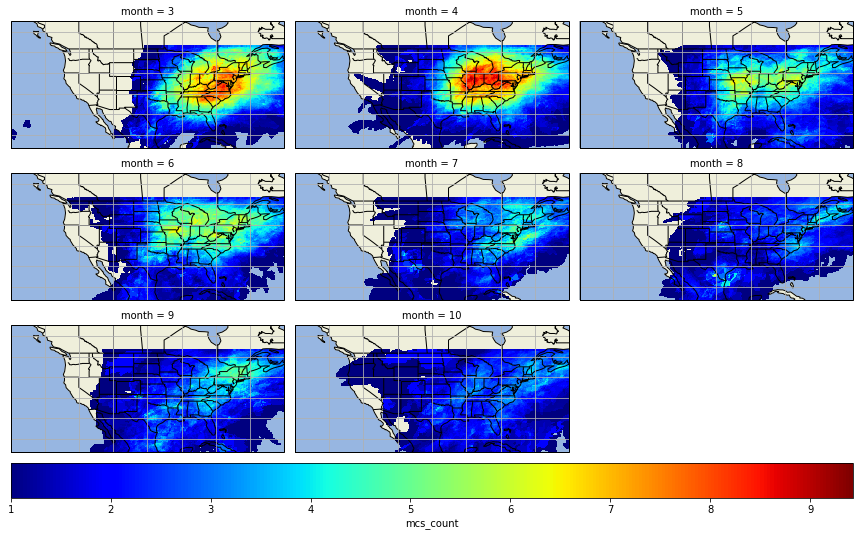

In [35]:
# E3SM

# dat = dsx['seasonal_mcs_count'].astype(np.float)
dat = dsx['mcs_count']
dat = dat.where(dat > 0)
# dat.values[dat.values <1e-3] = np.nan
# levs = range(2, 18, 2)
p = dat.mean(dim='year').plot(col='month', col_wrap=3, transform=ccrs.PlateCarree(),
                              subplot_kws={'projection': ccrs.PlateCarree()},
                              cbar_kwargs={'orientation': 'horizontal', 'pad': 0.02, 'aspect': 24},
                              cmap=plt.cm.jet, figsize=(12, 8))
for ax in p.axes.flatten():
    ax.add_feature(states_provinces, edgecolor='black', alpha=1)
    ax.coastlines()
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=1)
    ax.add_feature(cfeature.LAND)
    ax.gridlines()
    ax.set_extent([dat.lon.values[0], dat.lon.values[-1], dat.lat.values[0], dat.lat.values[-1]])

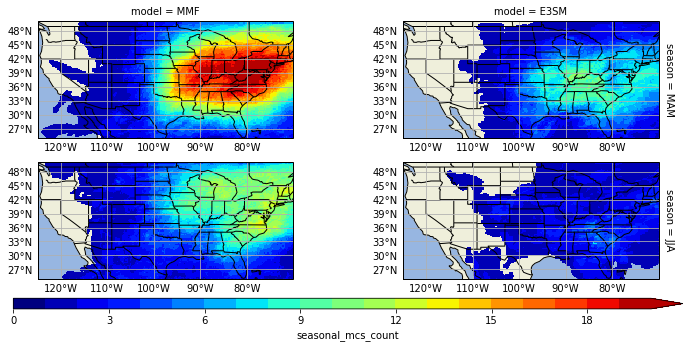

In [40]:
dat = ds['seasonal_mcs_count']
dat = dat.where(dat > 0)
levels = np.arange(0, 21)
p = dat.sel(season=seasons).mean(dim='year').plot(row='season', col='model',
                                                  transform=ccrs.PlateCarree(),
                                                  subplot_kws={'projection': ccrs.PlateCarree()},
                                                  cbar_kwargs={'orientation': 'horizontal', 'pad': 0.06, 'aspect': 60},
                                                  cmap=plt.cm.jet, figsize=(12, 6), robust=True,
                                                  levels=levels,
                                                  )
for ax in p.axes.flat:
    ax.set_extent([235 - 360, 290 - 360, 25, 47])
    ax.add_feature(states_provinces, edgecolor='black', alpha=1)
    ax.coastlines()
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=1)
    ax.add_feature(cfeature.LAND)    